<b> This notebook creates the content for our final project story map. </b>

In [1]:
import folium
import pandas as pd
import geopandas as gpd
from shapely import wkt
import plotly.express as px
# import that interact library
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import matplotlib.pyplot as plt
import contextily as ctx

/opt/conda/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.1-CAPI-1.13.3) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


# Isochrone Map

In [17]:
# import iso
iso = pd.read_csv('data/iso_3_11.csv')

In [18]:
# convert to gdf
iso['geometry'] = iso['geometry'].apply(wkt.loads)
iso = gpd.GeoDataFrame(iso, crs='epsg:3857')

# project to wgs84 and make geojson
isogson = iso.to_crs(epsg=4326).to_json()

In [19]:
# import vaccine locations
vac = gpd.read_file('data/vac_loc_3_11.geojson')

In [20]:
# extract lat/lon
vac['latitude'] = vac['geometry'].y
vac['longitude'] = vac['geometry'].x

In [21]:
def plotDot(point):
    #input: series that contains a numeric named latitude and a numeric named longitude
    #this function creates a CircleMarker and adds it to your this_map
    folium.CircleMarker(location=[point.latitude, point.longitude],
                        radius=2,
                        weight=0).add_to(map)


In [25]:
map = folium.Map([40.7335808, -73.9810874],
                  zoom_start=11,
                  tiles='cartodbpositron')

style = {'fillOpacity': '0.55', 'opacity': '0', 'fillColor': '#2D7673'}
polys = folium.features.GeoJson(isogson,
                              style_function = lambda x: style)

#locs = folium.features.GeoJson(locgson,
                              #style_function = lambda x: style)

#vloc = vac.apply(plotDot, axis = 1)

map.add_child(polys)
map

In [26]:
# save as html file
map.save('images/isochrones.html')

# ACS Maps


In [2]:
gdf = gpd.read_file('data/gdf_final.geojson')

In [3]:
gdf.columns = ('zcta',
 '%_iso',
 'borough',
 'cases_100k',
 'deaths_100k',
 '%_fully',
 '%_partial',
 'population',
 '%_hispanic',
 '%_white',
 '%_black',
 '%_native',
 '%_asian',
 '%_nhpi',
 '%_other',
 '%_multirace',
 '%_disability',
 '%_over65',
 '%_poverty',
 '%_foreign',
 '%_lessHS',
 '%_bachelorsbeyond',
 'geometry')

In [4]:
gdf['%_other'] = gdf['%_native'] + gdf['%_nhpi'] + gdf['%_other'] + gdf['%_multirace']

In [ ]:
dem = [
 '%_hispanic',
 '%_white',
 '%_black',
 '%_asian',
 '%_over65',
 '%_poverty']

In [ ]:
from IPython.display import display
from ipywidgets.embed import embed_minimal_html
from ipywidgets import interact, interactive, fixed, interact_manual


In [ ]:
# create function
def acs_map(Map=dem):
    fig= gdf.plot(
         column= Map,
               legend=True,
              cmap=plt.get_cmap('RdYlGn_r'))
    fig.set_title(Map)
    fig.axis('off')
    leg = fig.get_legend()
    ctx.add_basemap(fig,source=ctx.providers.CartoDB.Positron)


In [ ]:
# create widget
w = interactive(acs_map, Map = dem)

In [ ]:
display(w)

In [ ]:
# export widget
embed_minimal_html('acs.html', views=[w], title='Widgets export')

In [ ]:
titles = [
 'Percent Hispanic',
 'Percent White',
 'Percent Black',
 'Percent Asian',
 'Percent Over 65 Years Old',
 'Percent Living in Poverty']

In [ ]:
# give up and use matplotlib

f, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
# Make the axes accessible with single indexing
axs = axs.flatten()
# Start a loop over all the variables of interest
for i, col in enumerate(dem):
    # select the axis where the map will go
    ax = axs[i]
    # Plot the map
    gdf.plot(column=col, ax=ax, scheme='Quantiles', 
            linewidth=0, cmap='RdPu')
    # Remove axis clutter
    ax.set_axis_off()
    # Set the axis title to the name of variable being plotted
    ax.set_title(titles[i])
    
# Display the figure
plt.show()

In [ ]:
# ok try with Plot.ly express

import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.express as px

# Data

cols_dd = [
 '%_hispanic',
 '%_white',
 '%_black',
 '%_asian',
 '%_over65',
 '%_poverty']
# we need to add this to select which trace 
# is going to be visible
visible = np.array(cols_dd)

# define traces and buttons at once
traces = []
buttons = []
for value in cols_dd:
    traces.append(go.Choropleth(
       locations=df['iso_alpha'], # Spatial coordinates
        z=df[value].astype(float), # Data to be color-coded
        colorbar_title=value,
        visible= True if value==cols_dd[0] else False))

    buttons.append(dict(label=value,
                        method="update",
                        args=[{"visible":list(visible==value)},
                              {"title":f"<b>{value}</b>"}]))

updatemenus = [{"active":0,
                "buttons":buttons,
               }]


# Show figure
fig = go.Figure(data=traces,
                layout=dict(updatemenus=updatemenus))
# This is in order to get the first title displayed correctly
first_title = cols_dd[0]
fig.update_layout(title=f"<b>{first_title}</b>",title_x=0.5)
fig.show()

# Bar Chart of Demographics

In [5]:
gdf['%_hispanic'].mean()

26.152745875139793

In [6]:
d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d)

In [11]:
d = {'Demographic': ['Percent Hispanic', 
             'Black', 
             'Asian', 
             'White', 
             'Over 65', 
             'Living in Poverty'], 
     'Average (%)': [gdf['%_hispanic'].mean(), 
                 gdf['%_black'].mean(),
                 gdf['%_asian'].mean(),
                 gdf['%_white'].mean(),
                 gdf['%_over65'].mean(),
                 gdf['%_poverty'].mean()]
    }
df = pd.DataFrame(data=d)

In [15]:
import plotly.graph_objects as go

colors = ['#0B2625', '#103D5B', '#2D7673', '#FFC870', '#EE7744', '#87311C']

fig = go.Figure(data=[go.Bar(
    x=df.Demographic,
    y=df['Average (%)'],
    marker_color = colors)])

fig.update_xaxes(type='category')

fig.update_layout(
    title="ACS Demographics of New York City",
    yaxis_title="Average Percent",
    legend_title="Legend Title",
    font=dict(
        family="Arial, monospace",
        size=18,
        color="#103D5B"
    )
)


fig.show()

In [16]:
fig.write_html("dem_bar.html")

# Plotly Chloropleth

In [ ]:
import json
gson = json.loads('data/gdf_final.geojson')

In [ ]:
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
                   dtype={"fips": str})

import plotly.express as px

In [47]:
fig = px.choropleth(gdf, geojson=gdf.geometry, locations='zcta', color='%_iso',
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           labels={'%_iso':'Percent Walkshed Coverage'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Zip Code Map


In [41]:
# import
zc = gpd.read_file('data/nyc_zcta')
# set projection
zc = zc.to_crs("EPSG:3857")

In [ ]:
fig = zc.boundary.plot(figsize = (10,30), color = '#1A4644')
fig.set_axis_off()
ctx.add_basemap(fig,source=ctx.providers.CartoDB.Positron)
plt.savefig('zips.png')

In [42]:
# project to wgs84
zcgson = zc.to_crs(epsg=4326).to_json()

In [ ]:



map = folium.Map([40.7335808, -73.9810874],
                  zoom_start=11,
                  tiles='cartodbpositron')

style = {'fillOpacity': '0', 'opacity': '1', 'color': '#1A4644'}
polys = folium.features.GeoJson(zcgson,
                              style_function = lambda x: style)

map.add_child(polys)
map

In [ ]:
map.save('images/zips.html')

# Percent Iso


In [54]:
from matplotlib.colors import ListedColormap
new_cmap = ListedColormap(['#0B2625', '#103D5B', '#2D7673', '#FFC870', '#EE7744', '#87311C'])

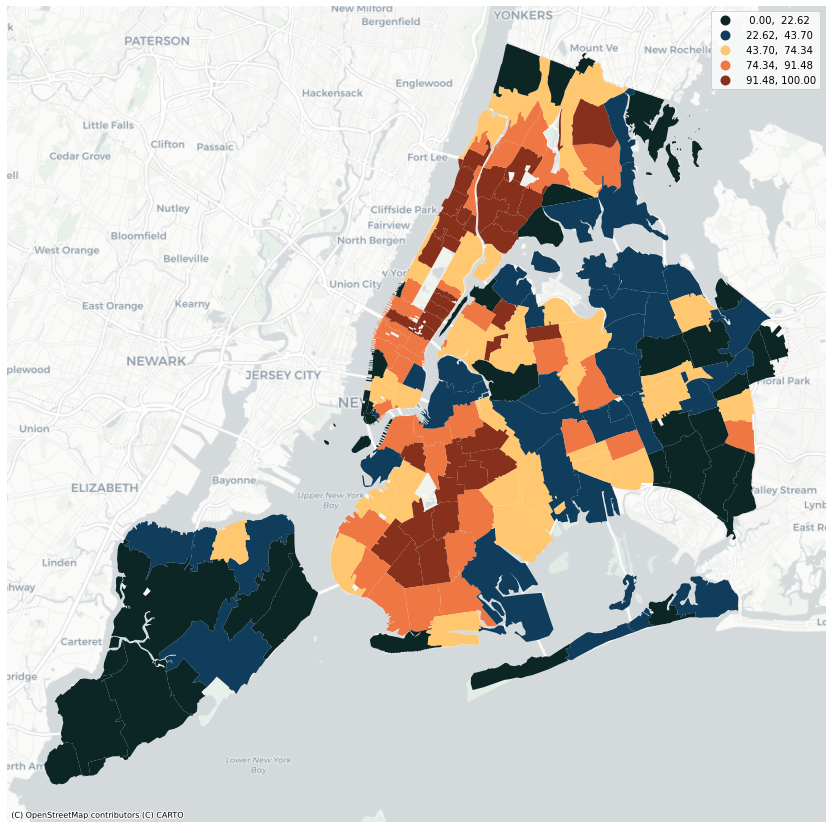

In [58]:
my_dpi = 150 

fig = gdf.plot(column='%_iso', figsize = (15,15),
        scheme = 'Quantiles', cmap = new_cmap, legend = True)

#plt.figure(figsize=(850/my_dpi, 500/my_dpi), dpi=my_dpi)

fig.set_axis_off()
ctx.add_basemap(fig,source=ctx.providers.CartoDB.Positron)

plt.savefig('images/%iso.jpg', dpi=my_dpi)
